In [1]:
import torch
import numpy as np
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style()

(256,)
--------------------------------------------------
(256, 256)


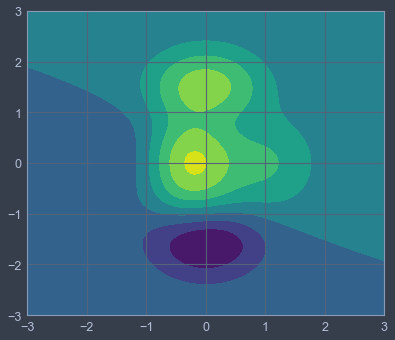

In [63]:
# 计算x,y坐标对应的高度值
def f(x, y):
    return (1 - x / 2 + x**3 + y**5) * np.exp(-x**2 - y**2)


# 生成x,y的数据
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)

print(x.shape)
print('-' * 50)
# 把x,y数据生成mesh网格状的数据，因为等高线的显示是在网格的基础上添加上高度值
X, Y = np.meshgrid(x, y)
print(X.shape)
# 填充等高线
plt.contourf(X, Y, f(X, Y))

In [25]:
def plot_decision_boundary(model, x, y):
    # Set min and max values and give it some padding
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    print('xx[:2] = ', xx[:2])
    print('yy[:2] = ', yy[:2])
    # Predict the function value for the whole grid
    temp = np.c_[xx.ravel(), yy.ravel()]
    print('temp[:2] = ',temp[:2])
    Z = model(temp)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

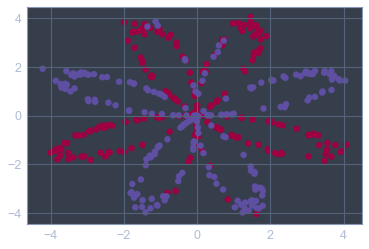

In [4]:
np.random.seed(1)
m = 400  # 样本数量
N = int(m / 2)  # 每一类的点的个数
D = 2  # 维度
x = np.zeros((m, D))
y = np.zeros((m, 1), dtype='uint8')  # label 向量，0 表示红色，1 表示蓝色
a = 4

for j in range(2):
    ix = range(N * j, N * (j + 1))
    t = np.linspace(j * 3.12,
                    (j + 1) * 3.12, N) + np.random.randn(N) * 0.2  # theta
    r = a * np.sin(4 * t) + np.random.randn(N) * 0.2  # radius
    x[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

In [5]:
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()

w = nn.Parameter(torch.randn(2, 1))
b = nn.Parameter(torch.zeros(1))

optimizer = torch.optim.SGD([w, b], 1e-1)


def logistic_regressions(x):
    return torch.mm(x, w) + b


criterion = nn.BCEWithLogitsLoss()

for e in range(100):
    out = logistic_regressions(x)
    loss = criterion(out, Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e + 1) % 20 == 0:
        print('epoch: {}, loss: {}'.format(e + 1, loss.data.item()))

epoch: 20, loss: 0.7132084369659424
epoch: 40, loss: 0.6739973425865173
epoch: 60, loss: 0.6731789112091064
epoch: 80, loss: 0.6731526851654053
epoch: 100, loss: 0.6731483936309814


In [18]:
def plot_logistic(x):
    x = Variable(torch.from_numpy(x).float())
    out = F.sigmoid(logistic_regressions(x))
    out = (out > 0.5) * 1  # tensor([[False]]) 变成了tensor([[0]])这样子
    return out.data.numpy()  # numpy保持维度

E:\Anaconda3\envs\test\lib\site-packages\torch\nn\functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Text(0.5, 1.0, 'logistic regression')

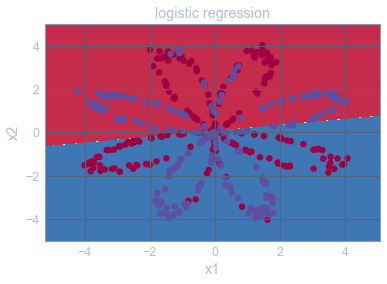

In [7]:

plot_decision_boundary(lambda x: plot_logistic(x), x.numpy(), y.numpy())
plt.title('logistic regression')

In [51]:
out = F.sigmoid(logistic_regression(torch.tensor([[1, 1]]).float()))
out = (out > 0.5)
print(out.data.numpy())

[[False]]


In [10]:
# 两层
w1 = nn.Parameter(torch.randn(2, 4))
b1 = nn.Parameter(torch.randn(4))

w2 = nn.Parameter(torch.randn(4, 1))
b2 = nn.Parameter(torch.randn(1))


def two_network(x):
    x1 = torch.mm(x, w1) + b1
    x1 = F.tanh(x1)
    x2 = torch.mm(x1, w2) + b2
    return x2

optimizer = torch.optim.SGD([w1, w2, b1, b2], lr=1)
criterion = nn.BCEWithLogitsLoss()

# 我们训练 10000 次
for e in range(10000):
    out = two_network(Variable(x))
    loss = criterion(out, Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data.item()))

E:\Anaconda3\envs\test\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch: 1000, loss: 0.28437256813049316
epoch: 2000, loss: 0.2722076177597046
epoch: 3000, loss: 0.265188992023468
epoch: 4000, loss: 0.25971347093582153
epoch: 5000, loss: 0.23430512845516205
epoch: 6000, loss: 0.22563615441322327
epoch: 7000, loss: 0.2219569832086563
epoch: 8000, loss: 0.21954326331615448
epoch: 9000, loss: 0.21770326793193817
epoch: 10000, loss: 0.21619662642478943


In [14]:
print(x.shape)
print(type(x))

torch.Size([400, 2])
<class 'torch.Tensor'>


xx[:2] =  [[-5.21189833 -5.20189833 -5.19189833 ...  5.05810167  5.06810167
   5.07810167]
 [-5.21189833 -5.20189833 -5.19189833 ...  5.05810167  5.06810167
   5.07810167]]
yy[:2] =  [[-5.03512383 -5.03512383 -5.03512383 ... -5.03512383 -5.03512383
  -5.03512383]
 [-5.02512383 -5.02512383 -5.02512383 ... -5.02512383 -5.02512383
  -5.02512383]]
temp[:2] =  [[-5.21189833 -5.03512383]
 [-5.20189833 -5.03512383]]


E:\Anaconda3\envs\test\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
E:\Anaconda3\envs\test\lib\site-packages\torch\nn\functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Text(0.5, 1.0, 'plot_network regression ')

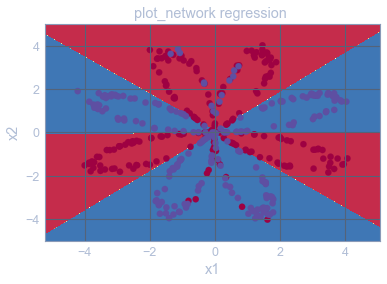

In [26]:
def plot_network(x):
    x = Variable(torch.from_numpy(x).float())
    x1 = torch.mm(x, w1) + b1
    x1 = F.tanh(x1)
    x2 = torch.mm(x1, w2) + b2
    out = F.sigmoid(x2)
    out = (out > 0.5) * 1
    return out.data.numpy()

plot_decision_boundary(lambda x: plot_network(x), x.numpy(), y.numpy())
plt.title('plot_network regression ')

In [40]:
jj, jjj = np.meshgrid(np.arange(0, 3, 1),
                         np.arange(3, 6, 1))
print(jj)
print(jjj)
print(jj.ravel())
temp = np.c_[jj.ravel(), jjj.ravel()]
print(temp)

[[0 1 2]
 [0 1 2]
 [0 1 2]]
[[3 3 3]
 [4 4 4]
 [5 5 5]]
[0 1 2 0 1 2 0 1 2]
[[0 3]
 [1 3]
 [2 3]
 [0 4]
 [1 4]
 [2 4]
 [0 5]
 [1 5]
 [2 5]]


In [41]:
seq_net = nn.Sequential(
    nn.Linear(2, 4), # PyTorch 中的线性层，wx + b
    nn.Tanh(),
    nn.Linear(4, 1)
)

seq_net[0].weight  #这里的w维度  在计算中会用x w^T  转置之后再矩阵乘法


Parameter containing:
tensor([[ 0.1785, -0.1258],
        [ 0.4154, -0.1699],
        [ 0.5978,  0.4775],
        [ 0.2512,  0.3726]], requires_grad=True)

In [42]:


class module_net(nn.Module):
    def __init__(self, num_input, num_hidden, num_output):
        super(module_net, self).__init__()
        self.layer1 = nn.Linear(num_input, num_hidden)
        self.layer2 = nn.Tanh()
        self.layer3 = nn.Linear(num_hidden, num_output)
    
    def forward(x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

mo_net = module_net(2, 4, 1)
l1 = mo_net.layer1
print(l1)
        

Linear(in_features=2, out_features=4, bias=True)


In [43]:
# 打印出第一层的权重
print(l1.weight)

Parameter containing:
tensor([[ 0.3460, -0.4160],
        [ 0.3889,  0.4486],
        [ 0.3643,  0.3134],
        [ 0.0818, -0.6602]], requires_grad=True)
